#### Social media ad scenario is a classification problem. The objective is to classify target audience and to predict if a user will buy the advertised item or not. We will employ scikit-learn library for classification. We will apply two different classification algorithms, i.e., KNN and Decision Tree on our dataset.

1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import sklearn as sk
import matplotlib.pyplot as plt 

2 Loading dataset

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


3 Check dataset shape

In [3]:
df.shape

(400, 5)

3 The info() method prints a concise summary of the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


4 Describe dataset statisticaly

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


5 To return the above information for all columns of dataset

In [6]:
df.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


6 Plot the distribution of column Age

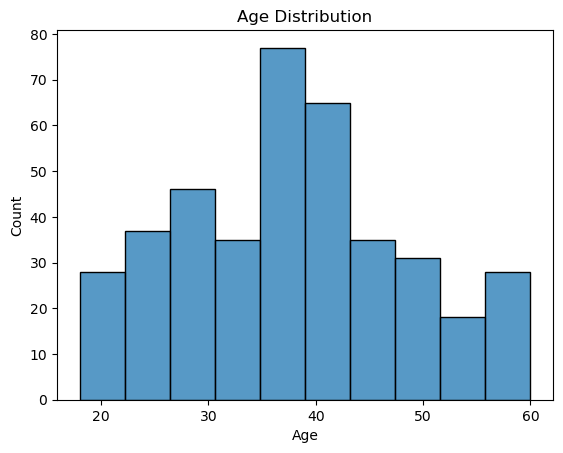

In [7]:
sns.histplot(df.Age)
plt.title("Age Distribution")
plt.show()

7 Age distribution of the people who have responded to the social media ads and bought the product and those who haven’t.

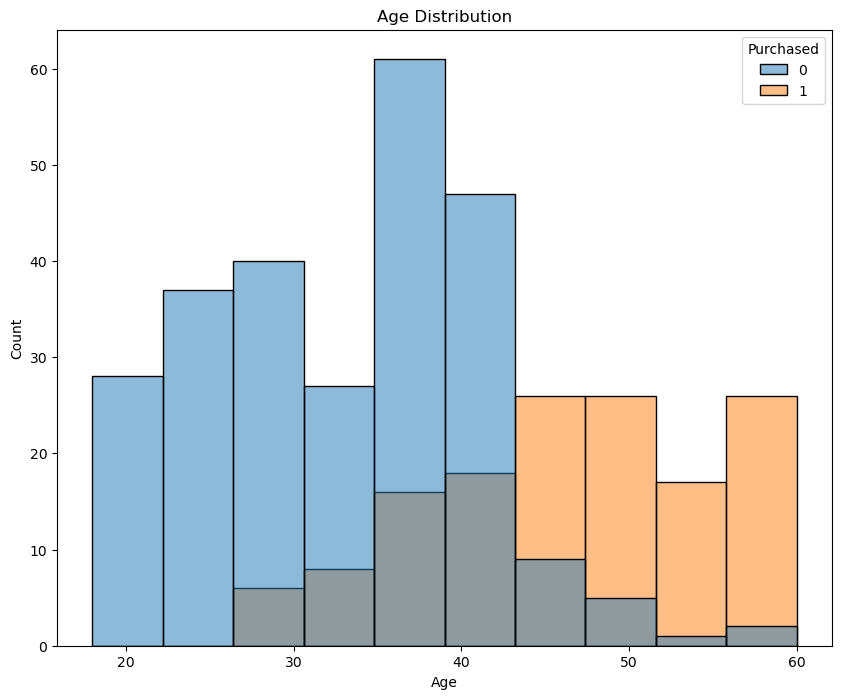

In [8]:
plt.figure(figsize=(10,8))
plt.title("Age Distribution")
sns.histplot(x="Age", hue="Purchased", data=df)
plt.show()

8 In our dataset, Gender has categorical value. We can use the below code to convert it to numerical value. It will replace Male by 0 and Female by 1 in the Gender column

In [9]:
df['Gender'] = df['Gender'].replace(['Male','Female'], [0,1])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [10]:
# again view data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


9 User ID has no effect on data so we slice it. and creat output y   and input x

In [11]:
x = df.iloc[:,[1,2,3]].values
y = df.iloc[:, 4].values

10 Splitting the dataset into the Training set and the Test set

In [12]:
# import library 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

11 We do scaling of our data so that the numaric date will be on same sccale 

In [13]:
# import library 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.fit_transform(X_test)
X_train_s


array([[-0.99288247, -1.1631724 , -1.5849703 ],
       [-0.99288247,  2.17018137,  0.93098672],
       [ 1.00716855,  0.0133054 ,  1.22017719],
       [-0.99288247,  0.20938504,  1.07558195],
       [ 1.00716855,  0.40546467, -0.48604654],
       [-0.99288247, -0.28081405, -0.31253226],
       [-0.99288247,  0.99370357, -0.8330751 ],
       [ 1.00716855,  0.99370357,  1.8563962 ],
       [ 1.00716855,  0.0133054 ,  1.24909623],
       [-0.99288247, -0.86905295,  2.26126285],
       [ 1.00716855, -1.1631724 , -1.5849703 ],
       [-0.99288247,  2.17018137, -0.80415605],
       [-0.99288247, -1.35925203, -1.46929411],
       [-0.99288247,  0.40546467,  2.2901819 ],
       [ 1.00716855,  0.79762394,  0.75747245],
       [-0.99288247, -0.96709276, -0.31253226],
       [-0.99288247,  0.11134522,  0.75747245],
       [-0.99288247, -0.96709276,  0.55503912],
       [-0.99288247,  0.30742485,  0.06341534],
       [-0.99288247,  0.69958412, -1.26686079],
       [ 1.00716855, -0.47689368, -0.023

In [14]:
X_train_s.shape

(280, 3)

12 Training the model

In [15]:
# from sklearn.neighbors import KNeighborsClassifier 
# classifier = KNeighborsClassifier(n_neighbors=8 , metric="minkowski", p=2)
# classifier.fit(X_train_s, y_train)


In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_s, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

13 We can check accuracy of our model

In [17]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test_s)
accuracy_score(y_test, y_pred)

0.9

In [18]:
# scors=[]
# for i in range(1,16):
#     classifier = KNeighborsClassifier(n_neighbors=i)
#     classifier.fit(X_train_s, y_train)
#     y_pred = classifier.predict(X_test_s)
#     scors.append(accuracy_score(y_test,y_pred))
    

In [19]:
# plt.plot(scors)

13 Once the model is trained, we can use the ‘predict’ function on our model to
make predictions on our test data

In [20]:
y_pred = classifier.predict(X_test_s)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [21]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

14 To measure the performance of the classification model we use the confusion matrix.

In [22]:
from sklearn.metrics import confusion_matrix
# y_pred = classifier.predict(X_test_s)
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  8],
       [ 4, 37]], dtype=int64)

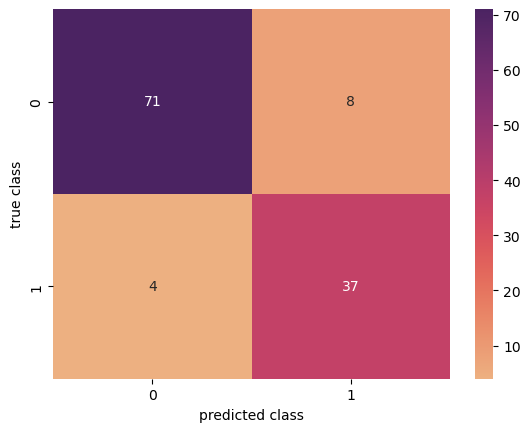

In [23]:
ac = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.show()